In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
import pydotplus

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = sns.load_dataset('iris')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.shape

(150, 5)

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(1)

sepal_length


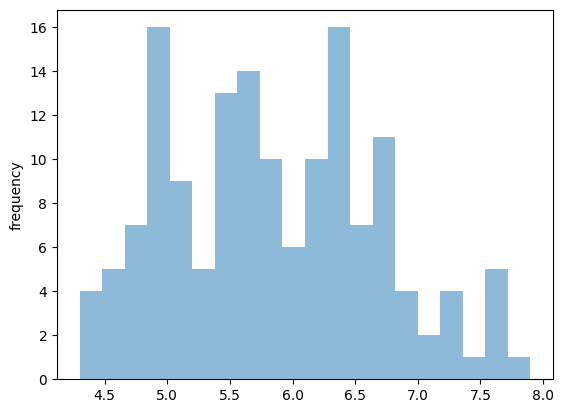

sepal_width


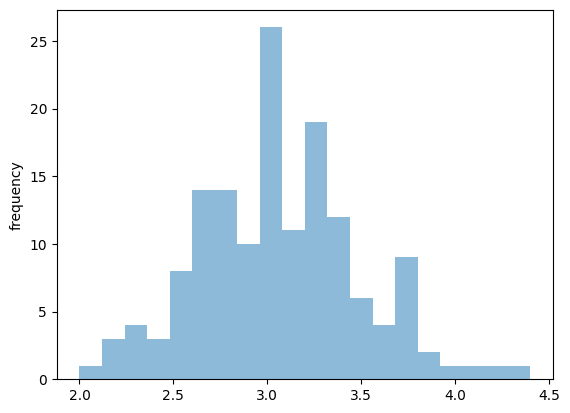

petal_length


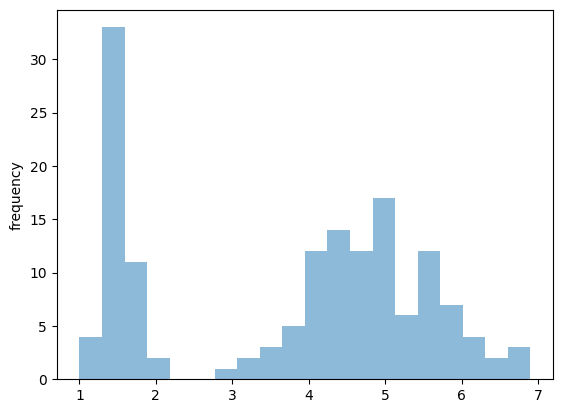

petal_width


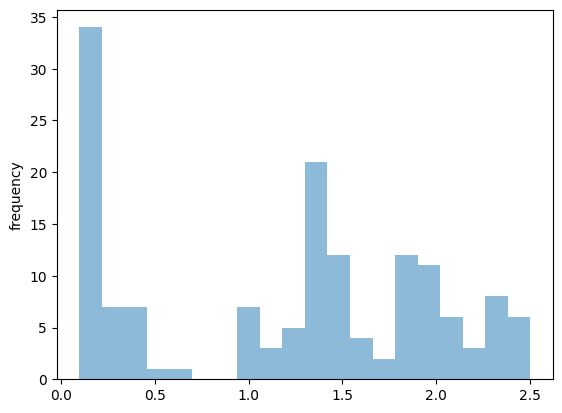

In [13]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for col in cols:
    print(col)
    plt.subplot(1,1,1)
    df[col].plot(kind = 'hist', alpha = 0.5, bins = 20)
    plt.ylabel('frequency')
    plt.show()   

In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
x = df.drop(columns  = ['species'])
y = df['species']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

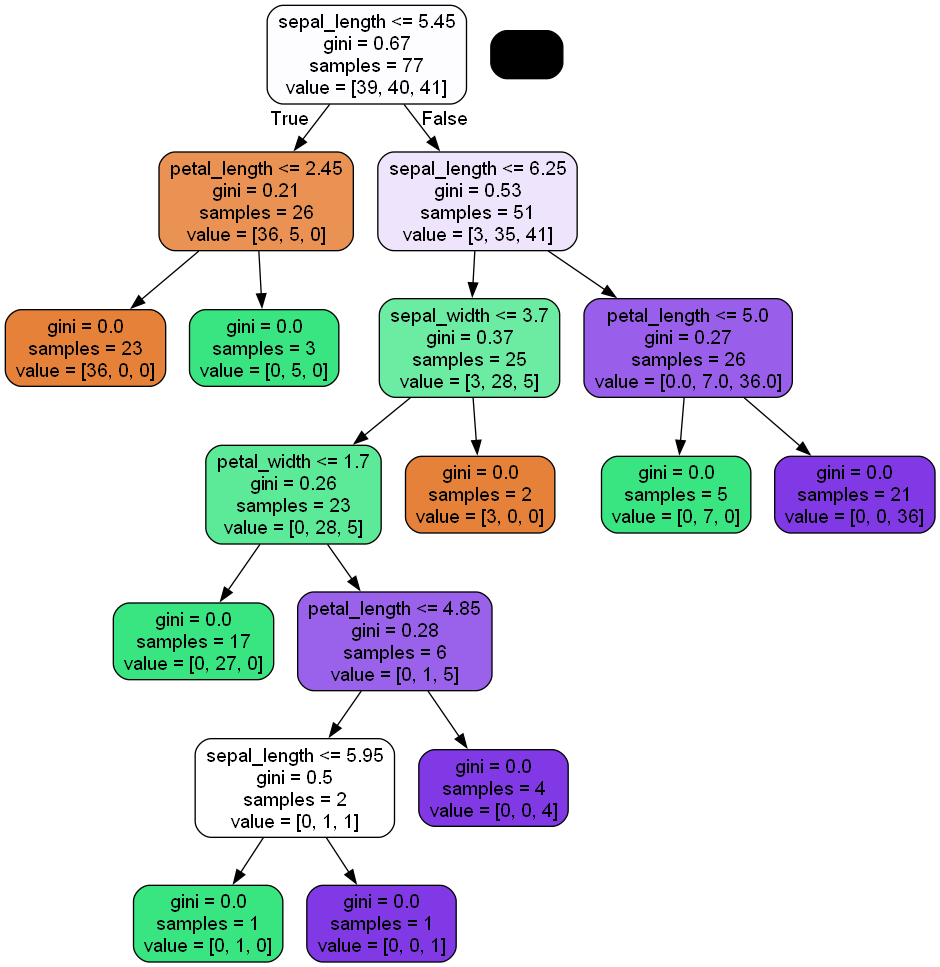

In [18]:
estimator = model.estimators_[3]
dot_data = export_graphviz(estimator, out_file=None, feature_names=X_train.columns, rounded =True, proportion = False, precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("classification_report: ", classification_rep)

Accuracy:  0.9333333333333333
classification_report:                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.88      0.88      0.88         8
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [20]:
new = [[5,3.4,2.1,0.2]]
y_pred_new = model.predict(new)
print(y_pred_new)

['setosa']
